# Neighborhood definitions
In pyclesperanto, neighbor adjacency graphs are used to investigate relationships between neighboring labeled objects, such as cells. This notebook demonstrates the considered neighborhood definitions. 

See also
* [Image Processing Filters for Grids of Cells Analogous to Filters Processing Grids of Pixels](https://www.frontiersin.org/articles/10.3389/fcomp.2021.774396/full)

In [2]:
import pyclesperanto_prototype as cle
import numpy as np
import matplotlib
from numpy.random import random

cle.select_device("RTX")

<NVIDIA GeForce RTX 3050 Ti Laptop GPU on Platform: NVIDIA CUDA (1 refs)>

For visualizing relationships between neighboring objects, we start at an artificial cell grid. Cells are aligned approximately in a honeycomb grid. Intensity in these cells is uniformly distributed. Just a single cell in the center of the grid has much higher intensity.

In [3]:
# Generate artificial cells as test data
tissue = cle.artificial_tissue_2d()

# fill it with random measurements
values = random([int(cle.maximum_of_all_pixels(tissue))])
for i, y in enumerate(values):
    if (i != 95):
        values[i] = values[i] * 10 + 45
    else:
        values[i] = values[i] * 10 + 90

measurements = cle.push(np.asarray([values]))

# visualize measurments in space
example_image = cle.replace_intensities(tissue, measurements)

## Example data
Let's take a look at an image with arbitrarily shaped pixels. Let's call them "cells". In our example image, there is one cell in the center with higher intensity:

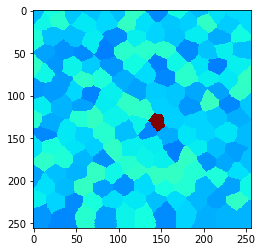

In [4]:
cle.imshow(example_image, min_display_intensity=30, max_display_intensity=90, color_map='jet')

## Touching neighbors
We can show all cells that belong to the "touching" neighborhood by visualizing the touching neighbor graph as mesh.

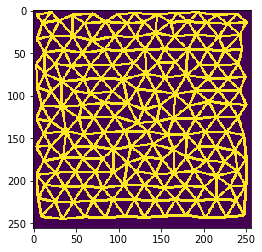

In [6]:
mesh = cle.draw_mesh_between_touching_labels(tissue)

# make lines a bit thicker for visualization purposes
mesh = cle.maximum_sphere(mesh, radius_x=1, radius_y=1)

cle.imshow(mesh)

If we apply a local maximum filter to this grid, we can see how the high intensity of the single cell in the center spreads to directly touching neighbor cells.

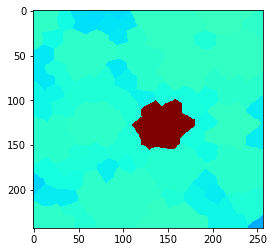

In [5]:
local_maximum = cle.maximum_of_touching_neighbors_map(example_image, tissue)

cle.imshow(local_maximum, min_display_intensity=30, max_display_intensity=90, color_map='jet')

## Neighbors of touching neighbors
You can also extend the neighborhood by considering neighbors of neighbor (of neighbors (of neighbors)). How far you go, can be configured with a radius parameter. 

* Radius==0 means, no neighbors are taken into account, 
* radius==1 is identical with touching neighbors, 
* radius > 1 are neighbors of neighbors.

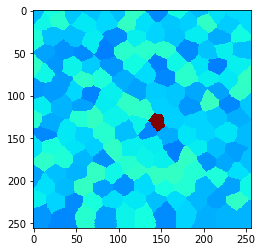

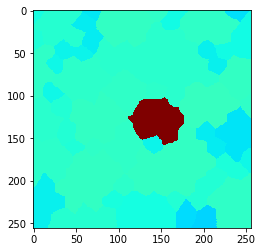

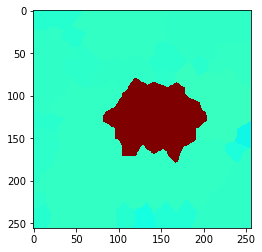

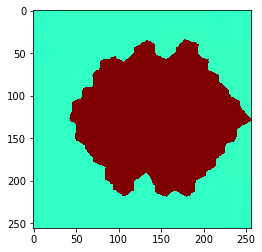

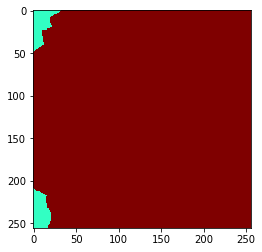

In [7]:
for radius in range(0, 5):
    local_maximum = cle.maximum_of_touching_neighbors_map(example_image, tissue, radius=radius)
    cle.imshow(local_maximum, min_display_intensity=30, max_display_intensity=90, color_map='jet')

## N nearest neighbors
You can also define a neighborhood from the distances between cells. As distance measurement, we use the Euclidean distance between label centroids. Also in this case you can configure how far the neighborhood should range by setting the number of nearest neighbors _n_. As mentioned above, neighborhoods include the center cell. Thus, the neighborhood of an object and its `n=1` nearest neighbor contains two neighbors.

n =  1


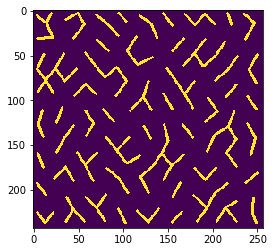

n =  2


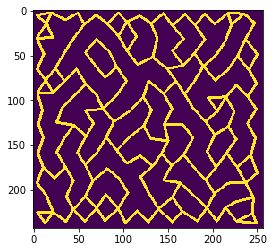

n =  3


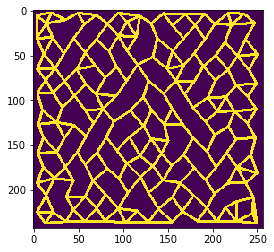

n =  4


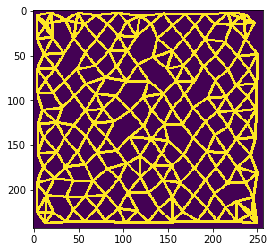

n =  5


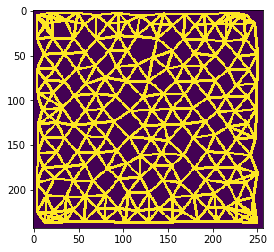

n =  6


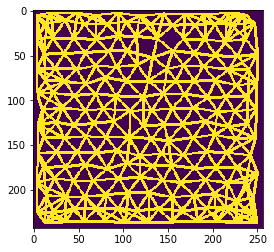

n =  7


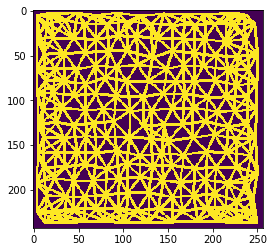

n =  8


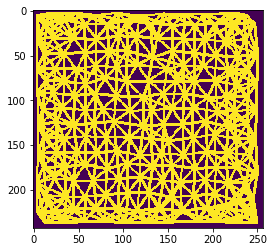

n =  9


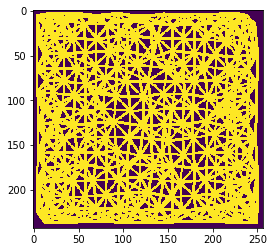

In [7]:
for n in range(1, 10):
    print("n = ", n)
    mesh = cle.draw_mesh_between_n_closest_labels(tissue, n=n)

    # make lines a bit thicker for visualization purposes
    mesh = cle.maximum_sphere(mesh, radius_x=1, radius_y=1)

    cle.imshow(mesh)

Also this can be visualized using the local maximum filter. Compared to neighbors-of-neighbors, the radius of the neighborhood can be tuned more fine-granular using n-nearest neighbors. Note that for computing the maximum in that neighborhood, not every increase by `n += 1` the size of the red area increases. This is due to the fact that not the maximum pixel pushes its intensity to the neighbors, it's the neighbors which pull that intensity when applying the maximum filter. 

n =  1


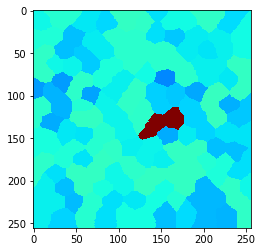

n =  2


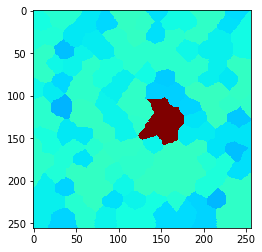

n =  3


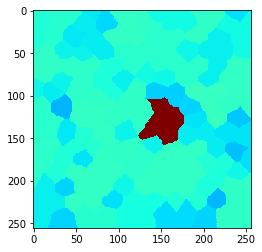

n =  4


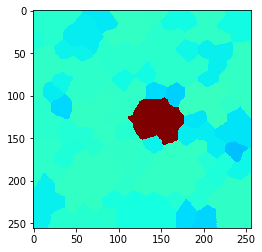

n =  5


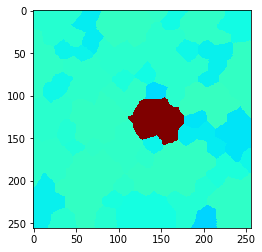

n =  6


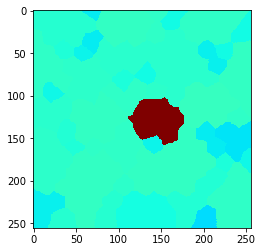

n =  7


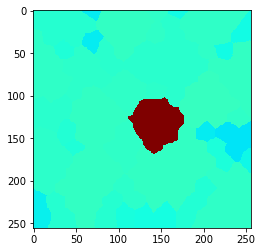

n =  8


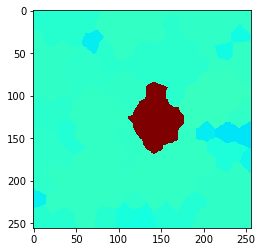

n =  9


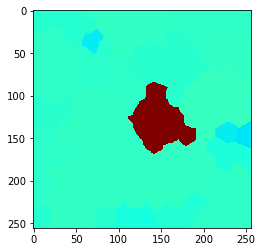

In [9]:
for n in range(1, 10):
    print("n = ", n)

    local_maximum = cle.maximum_of_n_nearest_neighbors_map(example_image, tissue, n=n)
    cle.imshow(local_maximum, min_display_intensity=30, max_display_intensity=90, color_map='jet')

## Proximal neighbors
We can also compute the local maximum of cells with centroid distances below a given upper threshold.

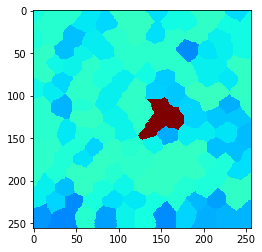

In [10]:
local_maximum = cle.maximum_of_proximal_neighbors_map(example_image, tissue, max_distance=20)
cle.imshow(local_maximum, min_display_intensity=30, max_display_intensity=90, color_map='jet')

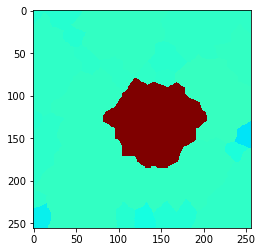

In [11]:
local_maximum = cle.maximum_of_proximal_neighbors_map(example_image, tissue, max_distance=50)
cle.imshow(local_maximum, min_display_intensity=30, max_display_intensity=90, color_map='jet')

# Exercise
Draw a mesh between proximal neighbors with different distances, e.g. in a for-loop.